In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.utils import parallel_backend
from joblib import parallel_backend

# Load the dataset
data = pd.read_csv('UsArrests.csv', index_col=0)
data.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
# Step 1: Data Preprocessing

# Check for missing values (NaN)
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


Since there are no missing values, we don't need to perform imputation.

In [15]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])  # Exclude the 'State' column

Step 2: Principal Component Analysis (PCA)

In [16]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [17]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Step 3: K-Means Clustering

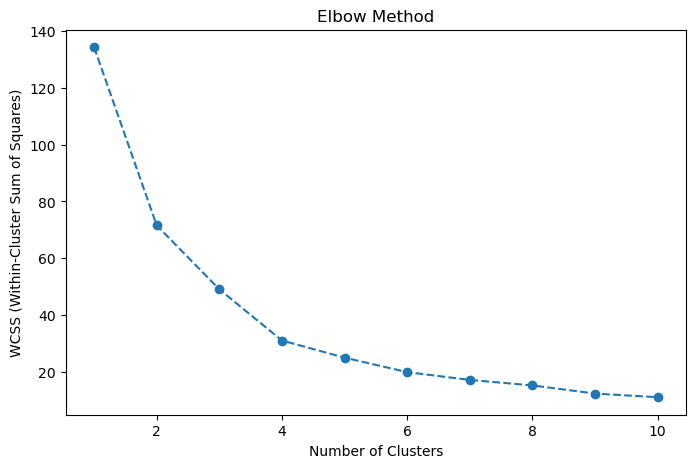

In [18]:
# Create an empty list to store the Within-Cluster Sum of Squares (WCSS) for different cluster numbers
wcss = []

# Determine WCSS for cluster numbers from 1 to 10
for i in range(1, 11):
    with parallel_backend('threading', n_jobs=1):  # Set n_jobs to 1 to suppress the warning
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
        kmeans.fit(principal_df)  # Use your data here
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, you can visually determine the optimal number of clusters.

In [19]:
# Perform K-Means clustering with the optimal number of clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10)  # Set n_init explicitly
kmeans_clusters = kmeans.fit_predict(principal_df)

# Add the cluster labels to the principal DataFrame
principal_df['Cluster'] = kmeans_clusters

Step 4: Analyze the Clusters

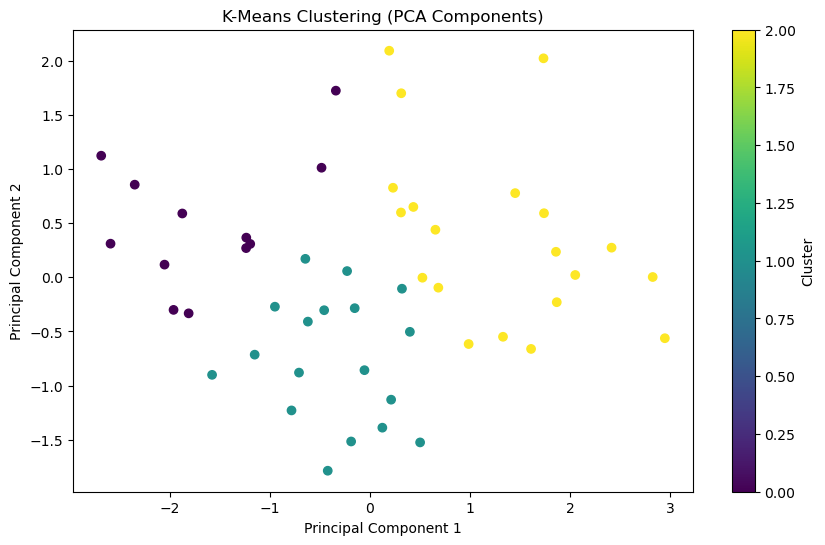

Silhouette Score: 0.35


In [20]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(principal_df[['PC1', 'PC2']], kmeans_clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


In [22]:
principal_df['Cluster'] = kmeans_clusters

#calculate the mean values of the original features for each cluster
cluster_means = principal_df.groupby('Cluster').mean()

# Print the mean values of the original features for each cluster
print("\nMean Values of Original Features for Each Cluster:")
print(cluster_means)


Mean Values of Original Features for Each Cluster:
              PC1       PC2
Cluster                    
0       -1.651227  0.504575
1       -0.353704 -0.754823
2        1.309070  0.376596


Here's a summary of the key points I have covered:

Data Preprocessing: I checked for missing values (none found) and standardized the data using StandardScaler.

Principal Component Analysis (PCA): performed PCA to reduce the dimensionality of the data to two principal components.

K-Means Clustering: used the Elbow Method to determine the optimal number of clusters, which was found to be 3. then applied K-Means clustering with this optimal number of clusters and added cluster labels to the dataset.

Visualization: created a scatter plot to visualize the clusters in the reduced feature space.

Cluster Analysis: calculated the Silhouette Score to evaluate the quality of the clusters. Additionally, calculated and displayed the mean values of the original features for each cluster.